In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE, StandardScaler as SS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.externals import joblib
warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv('mushrooms.csv')

In [32]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [33]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [35]:
data.shape

(8124, 23)

In [36]:
data['class'].unique()

array(['p', 'e'], dtype=object)

In [37]:
data.isnull()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:
#checking for null values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [39]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [40]:
#encoding all column values with LabelEncoder
le = LE()
df = data.apply(le.fit_transform)

In [41]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [42]:
df.shape

(8124, 23)

In [43]:
data.shape

(8124, 23)

In [44]:
data['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [45]:
df['cap-shape'].unique()

array([5, 0, 4, 2, 3, 1], dtype=int64)

In [46]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [47]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


class                          AxesSubplot(0.125,0.749828;0.133621x0.130172)
cap-shape                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
cap-surface                  AxesSubplot(0.44569,0.749828;0.133621x0.130172)
cap-color                   AxesSubplot(0.606034,0.749828;0.133621x0.130172)
bruises                     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
odor                           AxesSubplot(0.125,0.593621;0.133621x0.130172)
gill-attachment             AxesSubplot(0.285345,0.593621;0.133621x0.130172)
gill-spacing                 AxesSubplot(0.44569,0.593621;0.133621x0.130172)
gill-size                   AxesSubplot(0.606034,0.593621;0.133621x0.130172)
gill-color                  AxesSubplot(0.766379,0.593621;0.133621x0.130172)
stalk-shape                    AxesSubplot(0.125,0.437414;0.133621x0.130172)
stalk-root                  AxesSubplot(0.285345,0.437414;0.133621x0.130172)
stalk-surface-above-ring     AxesSubplot(0.44569,0.437414;0.133621x0.130172)

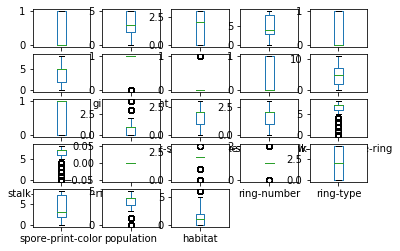

In [49]:
#Plotting all values in box plot
df.plot(kind='box',subplots=True,layout=(5,5))

In [52]:
df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


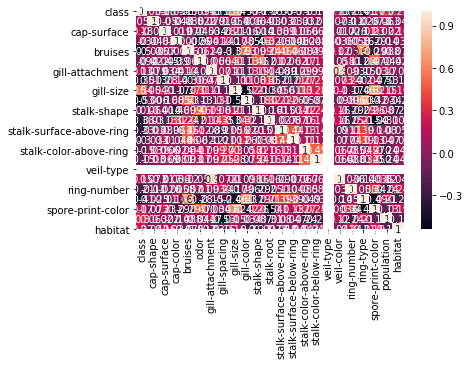

In [54]:
sns.heatmap(df.corr(),annot=True)

In [55]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [56]:
df['veil-type'].unique()

array([0], dtype=int64)

In [57]:
#from the above observation, we conclude that we can drop veil-type from dataset, 'cause it have only one value

In [58]:
df.drop("veil-type",axis=1,inplace=True)

In [59]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [61]:
#removing outliers
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [62]:
threshold = 3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [63]:
df = df[(z<3).all(axis=1)]

class                          AxesSubplot(0.125,0.749828;0.133621x0.130172)
cap-shape                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
cap-surface                  AxesSubplot(0.44569,0.749828;0.133621x0.130172)
cap-color                   AxesSubplot(0.606034,0.749828;0.133621x0.130172)
bruises                     AxesSubplot(0.766379,0.749828;0.133621x0.130172)
odor                           AxesSubplot(0.125,0.593621;0.133621x0.130172)
gill-attachment             AxesSubplot(0.285345,0.593621;0.133621x0.130172)
gill-spacing                 AxesSubplot(0.44569,0.593621;0.133621x0.130172)
gill-size                   AxesSubplot(0.606034,0.593621;0.133621x0.130172)
gill-color                  AxesSubplot(0.766379,0.593621;0.133621x0.130172)
stalk-shape                    AxesSubplot(0.125,0.437414;0.133621x0.130172)
stalk-root                  AxesSubplot(0.285345,0.437414;0.133621x0.130172)
stalk-surface-above-ring     AxesSubplot(0.44569,0.437414;0.133621x0.130172)

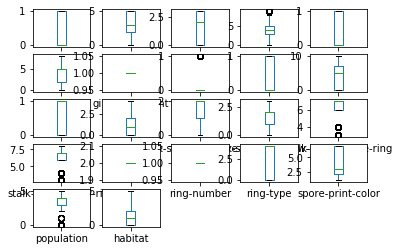

In [65]:
#Plotting all values in box plot
df.plot(kind='box',subplots=True,layout=(5,5))

In [66]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.000000,6568.0,6568.000000,6568.000000,6568.000000,...,6568.000000,6568.000000,6568.000000,6568.000000,6568.0,6568.0,6568.000000,6568.000000,6568.000000,6568.000000
mean,0.468940,3.415956,1.855055,4.378806,0.468940,4.276492,1.0,0.154689,0.381242,4.642509,...,1.607795,1.632156,6.254568,6.227771,2.0,1.0,2.233861,3.565164,3.717418,1.356882
std,0.499072,1.567311,1.222474,2.459402,0.499072,2.205310,0.0,0.361636,0.485729,3.569250,...,0.637597,0.695357,1.226972,1.246970,0.0,0.0,1.890274,2.238624,1.179718,1.625304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,3.000000,2.0,1.0,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,6.000000,6.000000,2.0,1.0,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.0,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.0,1.0,4.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,5.000000,1.000000,5.000000,1.0,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.0,1.0,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.0,1.000000,1.000000,10.000000,...,2.000000,3.000000,7.000000,8.000000,2.0,1.0,4.000000,7.000000,5.000000,5.000000


In [67]:
df.skew()

class                       0.124508
cap-shape                  -0.234646
cap-surface                -0.630373
cap-color                   0.811934
bruises                     0.124508
odor                       -0.172451
gill-attachment             0.000000
gill-spacing                1.910296
gill-size                   0.489136
gill-color                  0.048010
stalk-shape                -0.881319
stalk-root                  0.777382
stalk-surface-above-ring   -1.381335
stalk-surface-below-ring   -0.989929
stalk-color-above-ring     -1.776145
stalk-color-below-ring     -1.681096
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.231353
spore-print-color           0.697445
population                 -1.737467
habitat                     0.987162
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAD39303C8>,
      dtype=object)

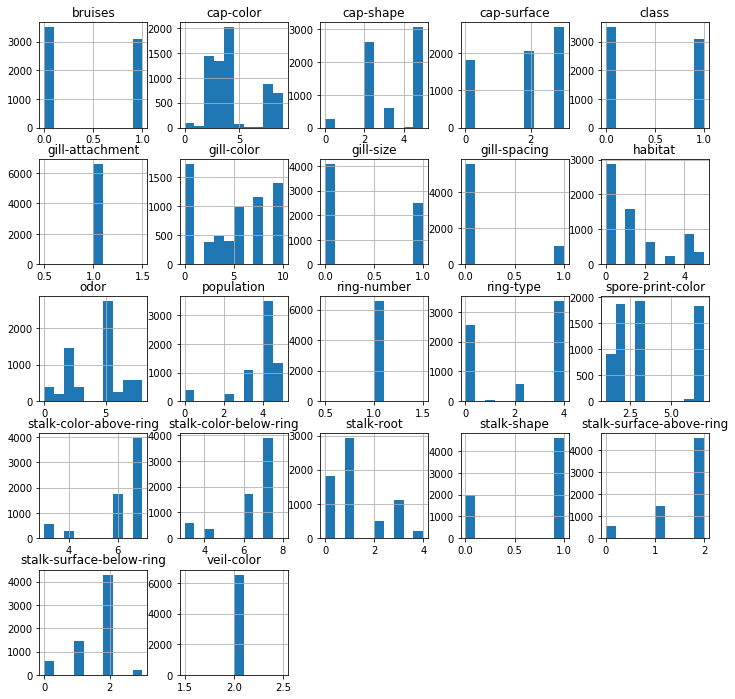

In [70]:
df.hist(figsize=(12,12))

In [74]:

for col in df.columns:
    transform = np.sqrt(df[col])
    df[col] = transform

In [75]:
df.skew()

class                       0.124508
cap-shape                  -1.334676
cap-surface                -0.887652
cap-color                   0.038800
bruises                     0.124508
odor                       -1.230535
gill-attachment             0.000000
gill-spacing                1.910296
gill-size                   0.489136
gill-color                 -0.586762
stalk-shape                -0.881319
stalk-root                 -0.258975
stalk-surface-above-ring   -2.175251
stalk-surface-below-ring   -1.974314
stalk-color-above-ring     -1.913515
stalk-color-below-ring     -1.818077
veil-color                  0.000000
ring-number                 0.000000
ring-type                  -0.352430
spore-print-color           0.436448
population                 -2.914320
habitat                     0.296326
dtype: float64

In [77]:
x = df.iloc[:,1:-1]
y = df['class']

In [78]:
y.shape

(6568,)

In [79]:
x.shape

(6568, 20)

In [81]:
#Scaling the data
scalar = SS()

scalar.fit(x)
x = scalar.transform(x)

### TESTING MODEL WITH TRAIN TEST SPLIT

In [85]:
def test_model(model):
    i = 0
    max_accu_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        accu_score = accuracy_score(test_y,pred_y)
        accu_score = round(accu_score*100)
        if accu_score > max_accu_score:
            max_accu_score = accu_score
            final_r_state = r_state
    print("Max Accuracy Score Corresponding to random state ", final_r_state, " is ",max_accu_score)    

#### LOGISTIC REGRESSION

In [89]:
lor = LR()

test_model(lor)

Max Accuracy Score Corresponding to random state  46  is  97.0


#### KNN

In [99]:
neighbors = {"n_neighbors":range(1,30)}
knn = KNN()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 4}

In [96]:
knn = KNN(n_neighbors=4)
test_model(knn)

Max Accuracy Score Corresponding to random state  42  is  100.0


#### GAUSSIAN NB

In [97]:
gnb = GNB()

test_model(gnb)

Max Accuracy Score Corresponding to random state  51  is  90.0


#### SVM

In [100]:
svclist = ['rbf','poly','linear']

for svck in svclist:
    svc = SVC(kernel=svck)
    print('Testing for SVC Kernel = ', svck)
    r_state_svm =  test_model(svc)
    print()

Testing for SVC Kernel =  rbf
Max Accuracy Score Corresponding to random state  42  is  100.0

Testing for SVC Kernel =  poly
Max Accuracy Score Corresponding to random state  42  is  100.0

Testing for SVC Kernel =  linear
Max Accuracy Score Corresponding to random state  45  is  98.0



#### DECISSION TREE 

In [102]:
dtclist = ['gini','entropy']

for dt in dtclist:
    dtc = DTC(criterion=dt)
    print('Testing for DTC = ', dt)
    test_model(dtc)
    print()

Testing for DTC =  gini
Max Accuracy Score Corresponding to random state  42  is  100.0

Testing for DTC =  entropy
Max Accuracy Score Corresponding to random state  42  is  100.0



from the above model we can conclude that DTC is giving best score

### SAVING MODEL

In [106]:
joblib.dump(dtc,'mushroom-prediction.pkl')

['mushroom-prediction.pkl']